In [3]:
#libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
#reading the csv
df = pd.read_csv(r'C:\Users\AAKASH\OneDrive\Documents\internship\reviews.csv')

In [9]:
#printing actual column data(reviews)
df['content'].head()

0    I have the same recurring tasks to do every da...
1    Instead of shopping around, I downloaded Any.d...
2    Why does every once in a while... out of the b...
3    Terrible Update! This app used to be perfect f...
4    This app is deceivingly terrible. There are so...
Name: content, dtype: object

In [10]:
#converting text into lower case
df['lw_content'] = df['content'].apply(lambda x: x.lower())

In [11]:
#removing non textual content
def remove_non_textual(text):
    return re.sub(r'[^\w\s]', '', text)
df['nt_content'] = df['lw_content'].apply(remove_non_textual)


In [12]:
# to strip HTML tags 
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
df['nonhtml_text'] = df['nt_content'].apply(remove_html_tags)

In [13]:
# to expand contractions 
df['ct_data'] = df['nonhtml_text'].apply(lambda x: contractions.fix(x))

In [14]:
#removing stop words
stopwords.words('english')
[punc for punc in string.punctuation]
def text_process(msg):
  nopunc= [char for char in msg if char not in string.punctuation]
  nopunc= ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
df['cleaned_data']= df['ct_data'].apply(text_process)

In [15]:
#printing cleaned data
df['cleaned_data'].head()

0    recurring tasks every day need todolist remind...
1    instead shopping around downloaded anydo widel...
2    every blue app asks update account emails ever...
3    terrible update app used perfect planning cert...
4    app deceivingly terrible really nice design fe...
Name: cleaned_data, dtype: object

In [16]:
#lemmatizing of data
lemmatizer = WordNetLemmatizer()
#Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)  # Tokenize the sentence into words
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])
    return lemmatized_sentence
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Get the POS tag
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 

In [17]:
df['lemmatized_text'] = df['cleaned_data'].apply(lemmatize_sentence)

In [18]:
df['lemmatized_text'].head()

0    recur task every day need todolist reminder bu...
1    instead shopping around download anydo widely ...
2    every blue app asks update account email every...
3    terrible update app use perfect planning certa...
4    app deceivingly terrible really nice design fe...
Name: lemmatized_text, dtype: object

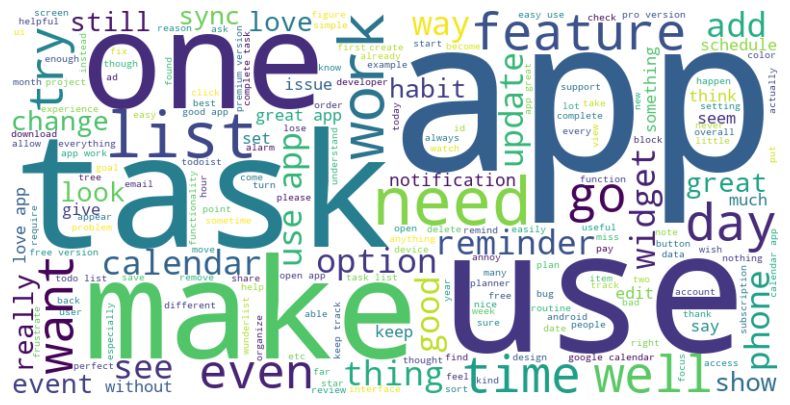

In [19]:
#Word Cloud
textvv = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textvv)

# Ploting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
#sentiment analysis
sid = SentimentIntensityAnalyzer()
def vader_sentiment_analysis(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

In [29]:
df['sanalysis_score'] = df['lemmatized_text'].apply(vader_sentiment_analysis)

In [30]:
print(df[['content', 'sanalysis_score']])

                                                 content  sanalysis_score
0      I have the same recurring tasks to do every da...          -0.8807
1      Instead of shopping around, I downloaded Any.d...           0.1027
2      Why does every once in a while... out of the b...          -0.8516
3      Terrible Update! This app used to be perfect f...           0.7906
4      This app is deceivingly terrible. There are so...           0.0480
...                                                  ...              ...
16782                                      Excellent app           0.5719
16783  I love it. Easy to use. Make my life organize....           0.9607
16784  I love how I could make plans and check the ap...           0.8555
16785                           Exactly what I needed!!!           0.0000
16786                                        Very good 👍           0.4404

[16787 rows x 2 columns]
